/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL/ch03
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL
0 train acc, test acc | 0.09915, 0.1009
600 train acc, test acc | 0.7858, 0.7917
1200 train acc, test acc | 0.8772, 0.8791
1800 train acc, test acc | 0.8961333333333333, 0.8973
2400 train acc, test acc | 0.9063, 0.9082
3000 train acc, test acc | 0.9125666666666666, 0.9122
3600 train acc, test acc | 0.9177, 0.9197
4200 train acc, test acc | 0.9223166666666667, 0.9223
4800 train acc, test acc | 0.9258666666666666, 0.9244
5400 train acc, test acc | 0.9294666666666667, 0.9296
6000 train acc, test acc | 0.9317666666666666, 0.9306
6600 train acc, test acc | 0.93485, 0.9336
7200 train acc, test acc | 0.9363166666666667, 0.9373
7800 train acc, test acc | 0.9388333333333333, 0.9392
8400 train acc, test acc | 0.9409166666666666, 0.9386
9000 train acc, test acc | 0.9436833333333333, 0.9418
9600 train acc, test acc | 0.9450833333333334, 0.9422


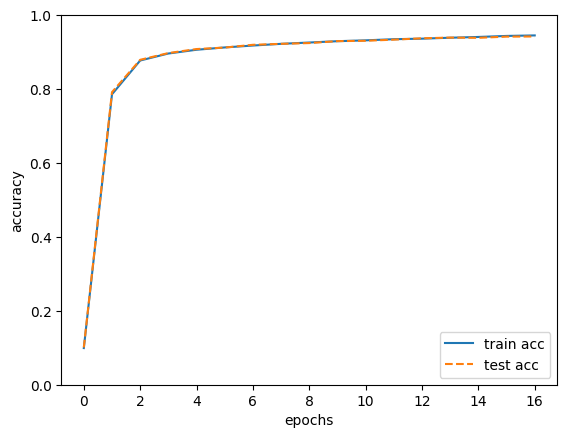

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
